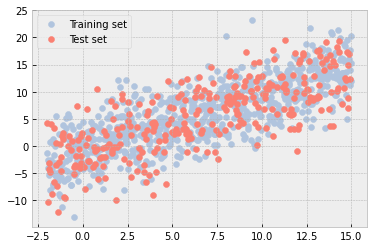

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import normal
plt.style.use('bmh')
%matplotlib inline

np.random.seed(3)

x = np.linspace(start = -2, stop=15, num=1000)
intercept, x_coef = -1, 1 
y = [x_coef*i + intercept for i in x]
y = [i+normal(0, 4) for i in y]

data = pd.DataFrame({'x': x, 'y': y})

# Split the data into training/testing sets
train, test = train_test_split(data, test_size=0.3)
X_train, X_test = train.x, test.x

# Split the targets into training/testing sets
y_train, y_test = train.y, test.y

plt.scatter(X_train, y_train, color='lightsteelblue', label = 'Training set')
plt.scatter(X_test, y_test, color='salmon', label = 'Test set')
plt.legend()

In [3]:
import mxnet as mx
from mxnet import nd, autograd, gluon


model_ctx=mx.cpu()
par={'weights':nd.random_normal(shape=1,ctx=model_ctx),'bias':nd.random_normal(shape=1,ctx=model_ctx)}
hyper={'alpha':nd.array(10.0, ctx=model_ctx)}

In [4]:
import sys
sys.path.append("../") 

# No Uncertainty

In [24]:
from hamiltonian.inference.bbb import bbb
from hamiltonian.models.linear import linear

par_aleatoric={'weights':nd.random_normal(shape=1,ctx=model_ctx),
     'bias':nd.random_normal(shape=1,ctx=model_ctx),
     'weights_scale':nd.random_normal(shape=1,ctx=model_ctx),
     'bias_scale':nd.random_normal(shape=1,ctx=model_ctx)}
hyper={'alpha':nd.array(10.0, ctx=model_ctx)}
model=linear(hyper,ctx=model_ctx)
inference=bbb(model,par_aleatoric,step_size=0.05,ctx=model_ctx)

In [25]:
import numpy as np

X_train_tensor=X_train.values[:,np.newaxis]
y_train_tensor=y_train.values

In [26]:
par,loss=inference.fit(epochs=1000,batch_size=64,gamma=0.9,
                       X_train=X_train_tensor,y_train=y_train_tensor,verbose=False)

100%|██████████| 1000/1000 [00:28<00:00, 35.25it/s]


In [17]:
X_test_tensor=nd.array(X_test.values[:,np.newaxis],ctx=model_ctx)

In [20]:
y_pred=model.predict(par,X_test_tensor)

In [22]:
y_pred.stddev


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan n

TypeError: type <class 'numpy.ndarray'> not supported

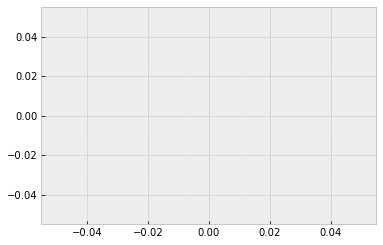

In [19]:
plt.scatter(X_test, y_pred.mean.asnumpy(), label = 'Prediction')
plt.plot(X_test,y_pred.mean.asnumpy()+2*y_pred.stddev,'g')
plt.plot(X_test,y_pred.mean.asnumpy()-2*y_pred.stddev,'g')
plt.scatter(X_test, y_test, label = 'Original data')
plt.legend()

In [16]:
y_pred.stddev


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan n

# Aleatoric Uncertainty

In [11]:
par_aleatoric={'weights':nd.random_normal(shape=1,ctx=model_ctx),
     'bias':nd.random_normal(shape=1,ctx=model_ctx),
     'weights_scale':nd.random_normal(shape=1,ctx=model_ctx),
     'bias_scale':nd.random_normal(shape=1,ctx=model_ctx)}
hyper={'alpha':nd.array(10.0, ctx=model_ctx)}

In [12]:
from hamiltonian.models.linear import linear_aleatoric
from hamiltonian.inference.sgd import sgd

model=linear_aleatoric(hyper,ctx=model_ctx)
inference=sgd(model,par_aleatoric,step_size=0.05,ctx=model_ctx)

In [13]:
par_aleatoric,loss=inference.fit(epochs=1000,batch_size=64,gamma=0.0,
                                 X_train=X_train_tensor,y_train=y_train_tensor,verbose=True)

  0%|          | 0/1000 [00:00<?, ?it/s]


TypeError: floss() takes 6 positional arguments but 7 were given

In [14]:
y_pred=model.predict(par_aleatoric,X_test_tensor)

KeyError: 'weights_scale'

AttributeError: 'int' object has no attribute 'asnumpy'

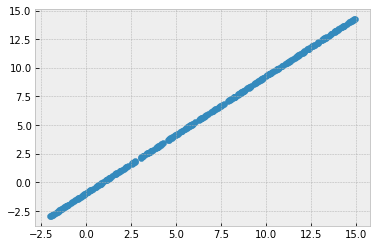

In [15]:
plt.scatter(X_test, y_pred.mean.asnumpy(), label = 'Prediction')
plt.plot(X_test,y_pred.mean.asnumpy()+2*y_pred.scale.asnumpy(),'g')
plt.plot(X_test,y_pred.mean.asnumpy()-2*y_pred.scale.asnumpy(),'g')
plt.scatter(X_test, y_test, label = 'Original data')
plt.legend()

In [16]:
y_pred.mean


[ 2.2621927   0.7503408   1.636599   11.037883    2.557612    7.2321877
  4.973099    3.2005835   3.7740445   9.838828   11.993651    7.1626773
 13.24484    -2.4471388   3.1484509   1.2021586   7.857782   -0.8483989
  1.6713542   3.0615625  -0.10116184  3.3048491  -1.9779433  12.202183
 11.872008   -2.2907403   8.657151    1.0110049  -1.9431881  -1.3349719
  7.475475    6.8672585  11.420191   -0.3096931   7.423342    1.7234868
 11.680855   -1.4044824   7.840404    6.623972    2.175305    6.1373987
 -0.11853945  0.31590068  4.225862    6.64135     4.0694637  -1.7867897
  7.701383   14.183229   12.410715    9.97785     8.292222    1.3064243
 12.497602    8.326977   10.325401    5.0426097   7.9099145   5.007855
  2.731388    4.8862114  10.447045   13.366483   13.627147   13.192706
  1.1152707  -2.5514045   7.4928527   4.5212817  -1.0569302  -2.082209
  0.36803353  8.88306    14.009454   14.200608    5.6508265   5.8072243
  6.3806853   3.2179613  11.698232    9.5260315   0.19425738 10.950